In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import horus as ho

In [2]:
bs, bsh, (nfp, coils, ma, sc_fieldline) = ho.ncsx()

#### Poincare plot

In [ ]:
nfieldlines = 30
phis = [0]    #[(i / 4) * (2 * np.pi / nfp) for i in range(4)]
Rs = np.linspace(ma.gamma()[0, 0], ma.gamma()[0, 0] + 0.14, nfieldlines)
Zs = [ma.gamma()[0, 2] for i in range(nfieldlines)]
RZs = np.array([[r, z] for r, z in zip(Rs, Zs)])

In [ ]:
fig, axs = ho.poincare_simsopt(bsh, RZs, phis, sc_fieldline, tol = 1e-8)

In [ ]:
for col in axs[0,0].collections:
    col.set_color('black')
    col.set_sizes([0.5])

In [ ]:
pickle.dump(fig, open("output/poincare_figure.pickle", "wb"))

#### Plot the convergence domains

In [3]:
ps = ho.SimsoptBfieldProblem(ma.gamma()[0, 0], 0, 3, bs)

In [ ]:
R = np.linspace(1.2, 1.8, 31)
Z = np.linspace(-0.6, 0.6, 61)

##### With checkonly

In [ ]:
convdom_checkonly = ho.convergence_domain(ps, R, Z, rtol = 1e-10, tol = 1e-8, eps = 1e-5, checkonly = True)

In [4]:
fig_checkonly = pickle.load(open("output/poincare_figure.pickle", "rb"))

In [8]:
plt.show()

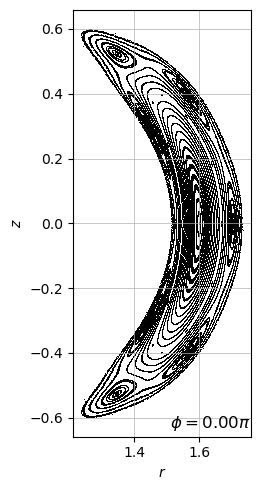

In [9]:
fig_checkonly

In [10]:
ho.plot_convergence_domain(*convdom_checkonly, fig_checkonly.get_axes()[0])

(<Figure size 800x500 with 1 Axes>,
 <Axes: title={'right': '$\\phi = 0.00\\pi$ '}, xlabel='$r$', ylabel='$z$'>)

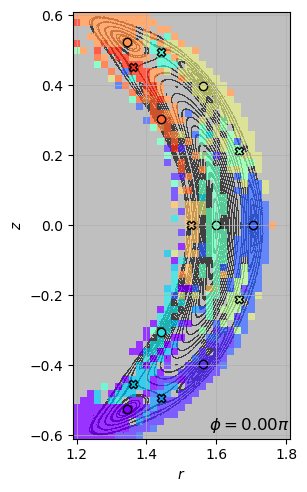

In [11]:
fig_checkonly

In [13]:
fig_checkonly.savefig("../figures/convergence_domain_checkonly.png", dpi=600)

##### Without checkonly

In [ ]:
convdom = ho.convergence_domain(ps, R, Z, rtol = 1e-10, tol = 1e-6, eps = 1e-4, checkonly = False)

In [ ]:
fig = pickle.load(open("output/poincare_figure.pickle", "rb"))

In [ ]:
ho.plot_convergence_domain(*convdom, ax=fig.get_axes()[0])

In [ ]:
fig

In [ ]:
fig.savefig("../figure/convergence_domain.png", dpi=600)